# Heart Disease Prediction System

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## Data Preprocessing

#Reading CSV files

In [2]:
dataset = pd.read_csv('processed.cleveland.data.csv')

In [3]:
heart_data = dataset[~dataset.isin(['?'])]

In [4]:
heart = heart_data.fillna(0.0)

In [5]:
heart["result"] = np.where(heart["result"] > 0, 1, heart["result"])

In [6]:
info = ["        age","        1: male, 0: female","        chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure","        serum cholestoral in mg/dl","        fasting blood sugar > 120 mg/dl","        resting electrocardiographic results (values 0,1,2)","maximum heart rate achieved","        exercise induced angina","ST depression induced by exercise relative to rest","        the slope of the peak exercise ST segment","        number of major vessels (0-3) colored by flourosopy","        thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(heart.columns[i]+":\t"+info[i])

age:	        age
sex:	        1: male, 0: female
cp:	        chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:	resting blood pressure
chol:	        serum cholestoral in mg/dl
fbs:	        fasting blood sugar > 120 mg/dl
restcg:	        resting electrocardiographic results (values 0,1,2)
thalach:	maximum heart rate achieved
exang:	        exercise induced angina
oldpeak:	ST depression induced by exercise relative to rest
slope:	        the slope of the peak exercise ST segment
ca:	        number of major vessels (0-3) colored by flourosopy
thal:	        thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#Top 10 data

In [7]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,result
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


Tail 10 

In [8]:
heart.tail(10)

,age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,result
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,1
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,1
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


Checking rows and columns

In [9]:
print("(Rows, columns): " + str(heart.shape))
heart.columns

(Rows, columns): (303, 14)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restcg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'result'],
      dtype='object')

##Checking data size

In [10]:
heart.size

4242

##Getting the statistical measures of the data

##Summarizes the count, mean, standard deviation, min, and max for numeric variables.

In [11]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Testing Missing Values

In [12]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restcg      0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
result      0
dtype: int64

##Checking the result

0 ==> heart is okay, and 1,2,3,4 ==> heart disease.

In [13]:
heart['result'].value_counts()

0    164
1    139
Name: result, dtype: int64

## Data Visualization

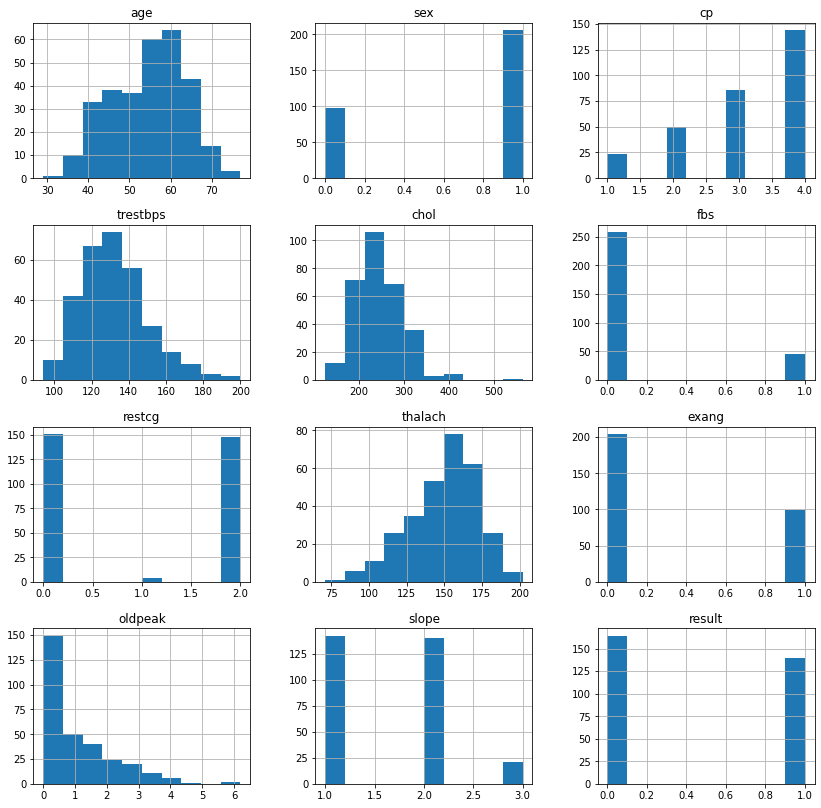

In [14]:
heart.hist(figsize=(14,14))
plt.show()

In [15]:
countNoDisease = len(heart[heart.result == 0])
countHaveDisease = len(heart[heart.result > 0])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart.result))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart.result))*100)))

Percentage of Patients Haven't Heart Disease: 54.13%
Percentage of Patients Have Heart Disease: 45.87%


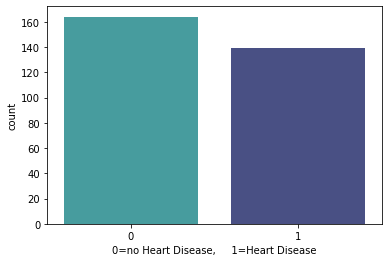

In [16]:
sns.countplot(x="result", data=heart, palette="mako_r")
plt.xlabel("0=no Heart Disease,     1=Heart Disease")
plt.show()

In [17]:
countFemale = len(heart[heart.sex == 0])
countMale = len(heart[heart.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(heart.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(heart.sex))*100)))

Percentage of Female Patients: 32.01%
Percentage of Male Patients: 67.99%


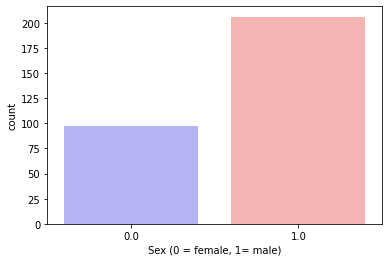

In [18]:
sns.countplot(x='sex', data=heart, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

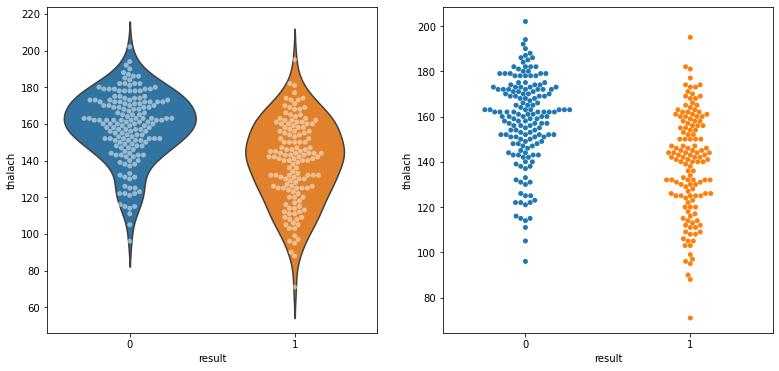

In [19]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="result", y="thalach", data=heart, inner=None)
sns.swarmplot(x="result", y="thalach", data=heart, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="result", y="thalach", data=heart)
plt.show()

D:\App\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\App\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\App\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogra

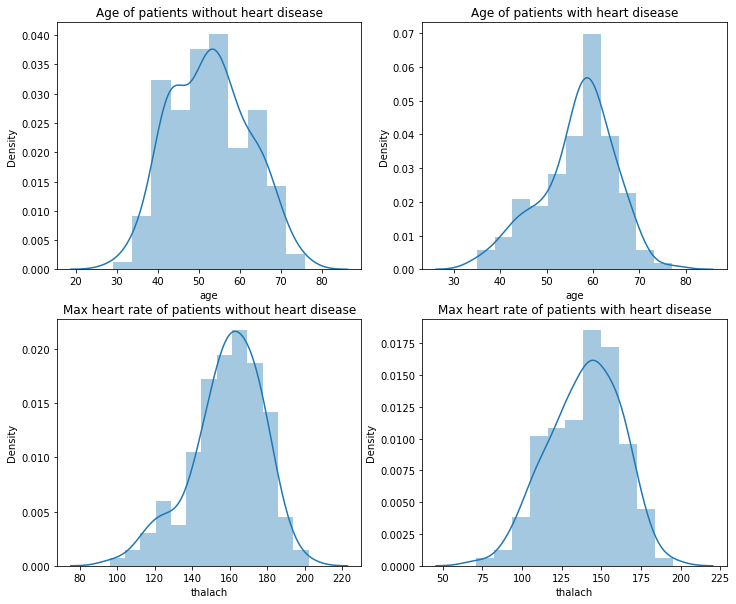

In [20]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['result']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['result']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['result']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['result']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

## Separating Feature and Label

In [21]:
#Separate Feature and Label 
feature = heart.drop('result',axis = 1) 
label = heart.result

In [22]:
feature

,age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [23]:
label

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: result, Length: 303, dtype: int64

## Data Standardization

In [24]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(feature)

In [25]:
X_scale

array([[ 0.94872647,  0.68620244, -2.25177456, ...,  2.27457861,
        -0.71113139,  0.65913253],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         2.5048807 , -0.86542592],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         1.43287667,  1.16731868],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.64911323,
         0.36087264,  1.16731868],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.64911323,
         0.36087264, -0.86542592],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.97635214,
        -0.71113139, -0.86542592]])

## Spliting Training data and Testing data (80%,20%)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, label, test_size=0.2, random_state=0)

In [27]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(Y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(Y_test.shape))

train_set_x shape: (242, 13)
train_set_y shape: (242,)
test_set_x shape: (61, 13)
test_set_y shape: (61,)


In [28]:
scores_dict = {}

## SVM (Support Vector Machines)

In [29]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [30]:
#Train the model using the training sets
clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [31]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

Checking accuracy, precision, recall, f1_score and confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[31,  4],
       [ 9, 17]], dtype=int64)

In [33]:
print('Accuracy',accuracy_score(Y_test,y_pred)*100)
print('Precision',precision_score(Y_test,y_pred)*100)
print('Recall',precision_score(Y_test,y_pred)*100)
print('F1',f1_score(Y_test,y_pred)*100)

Accuracy 78.68852459016394
Precision 80.95238095238095
Recall 80.95238095238095
F1 72.34042553191489


## Tuning SVM

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'C':[0,1,1,10,100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf','poly','sigmoid','linear']}

In [36]:
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)

In [37]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ...........................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=0, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=0, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=0, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=0, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=0, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0, gamma=1, k

[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

D:\App\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "D:\App\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\App\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "D:\App\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 189, in sklearn.svm._libs

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [38]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.01)


In [39]:
grid_predictions = grid.predict(X_test)

In [40]:
grid_predictions

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [41]:
print('Accuracy:',accuracy_score(Y_test,grid_predictions)*100)
print('Precision:',precision_score(Y_test,grid_predictions)*100)
print('Recall:',precision_score(Y_test,grid_predictions)*100)
print('F1:',f1_score(Y_test,grid_predictions)*100)

Accuracy: 80.32786885245902
Precision: 88.88888888888889
Recall: 88.88888888888889
F1: 72.72727272727273


In [42]:
param_grid1 = {'C':[0.01,0.1,1,10,100], 'gamma':[0.1,0.5,0.01,0.001], 'kernel':['rbf','poly','sigmoid','linear']}

In [43]:
grid1 = GridSearchCV(svm.SVC(),param_grid1,refit=True,verbose=2)

In [44]:
grid1.fit(X_train,Y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, k

[CV] END ......................C=0.1, gamma=0.5, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.5, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.1, 0.5, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [45]:
print(grid1.best_estimator_)

SVC(C=1, gamma=0.01)


In [46]:
grid1_predictions = grid1.predict(X_test)

In [47]:
print('Accuracy :',accuracy_score(Y_test,grid1_predictions)*100)
print('Precision:',precision_score(Y_test,grid1_predictions)*100)
print('Recall   :',precision_score(Y_test,grid1_predictions)*100)
print('F1       :',f1_score(Y_test,grid1_predictions)*100)

Accuracy : 80.32786885245902
Precision: 88.88888888888889
Recall   : 88.88888888888889
F1       : 72.72727272727273


In [48]:
scores_dict['SVM'] = accuracy_score(Y_test,grid1_predictions)*100

Text(0.5, 0, 'Permutation Importance')

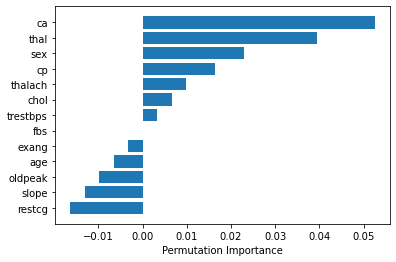

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.inspection import permutation_importance

svc =  svm.SVC(kernel='rbf', C=1)
svc.fit(X_train, Y_train)

perm_importance = permutation_importance(svc, X_test, Y_test)

feature_names = ['age','sex','cp','trestbps','chol','fbs','restcg','thalach','exang','oldpeak','slope','ca','thal']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

## Decision Tree

In [50]:
tree = DecisionTreeClassifier(random_state=0)

In [51]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [52]:
tree_test_pred = tree.predict(X_test)

In [53]:
print("Accuracy :",accuracy_score(Y_test,tree_test_pred)*100)
print('F1       :',f1_score(Y_test,tree_test_pred)*100)

Accuracy : 73.77049180327869
F1       : 71.42857142857142


In [54]:
scores_dict['DecisionTree'] = accuracy_score(Y_test,tree_test_pred)*100

## Logistic Regression

In [55]:
logistic = LogisticRegression()
logistic.fit(X_train,Y_train)

LogisticRegression()

In [56]:
lo_test_pred = logistic.predict(X_test) 

In [57]:
print("Accuracy :",accuracy_score(Y_test,lo_test_pred)*100)
print('F1       :',f1_score(Y_test,lo_test_pred)*100)

Accuracy : 78.68852459016394
F1       : 72.34042553191489


In [58]:
scores_dict['LogisticRegression'] = accuracy_score(Y_test,lo_test_pred)*100

D:\App\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


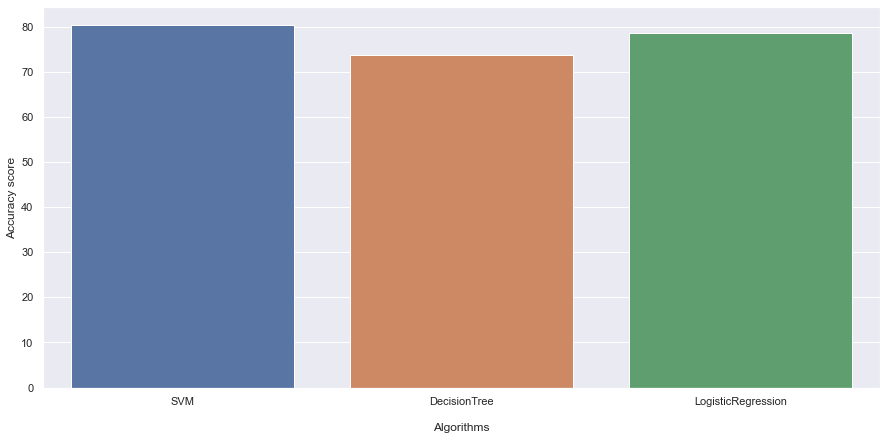

In [59]:
with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("\nAlgorithms")
  plt.ylabel("Accuracy score")

  sns.barplot(algo_name,scoress)

## Input Data Using SVM

In [60]:
data = (63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1)

In [61]:
input_data =np.asarray(data)

In [62]:
input_data_reshaped = input_data.reshape(1,-1)

Standardize the input data

In [63]:
std_data = scaler.transform(input_data_reshaped)

D:\App\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
prediction = grid1.predict(std_data)

In [65]:
if (prediction[0]==0):
    print('No heart disease! Yay!!!')
else:
    print('The person has heart disease!!')    

No heart disease! Yay!!!


Pickle saving model

In [66]:
import pickle as pkl
pkl.dump(grid1,open("final_model.p","wb"))